# **`ANALYSE DE L'ATTRITION DE LA CLIENTELE D'UN OPERATEUR TELEPHONIQUE`**



**Définition de l'attrition clientèle** : <br>

L'attrition (ou churn) est une notion markéting qui se caractérise par l'abandon d'une marque d'un produit ou d'un service de la part de clients existants.
On parle ***taux d'attrition** (ou ***customer churn rate*** en anglais).
Pour notre étude, il s'agit d'étudier la perte de clients par rapport à la clientèle globale d'un operateur téléphonique.

L'importance de l'étude de ce problème, est de permettre à une entreprise d'augmenter ses ***profits***.<br>
Puisque, le ***nombre de clients*** et ***profits*** sont corrélés, alors, il y'a deux possibilités d'augmenter son chiffre d'affaires :<br>

***- Ajout de nouveaux clients*** : Ce choix est beaucoup plus complexe car les marchés sont saturés parexemle pour les opérateurs téléphoniques, il y'a Orange, Tigo..., ceci dit que les clients sont répartis entre ces opérateurs.Donc, il serait difficile parexemple pour Expresso de recruter de nouveaux clients. <br>.

***- Fidélisation des clients présents*** : Ce choix est plus facile à faire.Parexemple, on peut les proposer de nouvelles offres.<br>

Cependant, les ressources d'une entreprise sont limitées pour fidéliser les clients, c'est pour celà qu'il est utile d'étudier le phénomène de **l'attrition** en vue de savoir quels sont les clients qui vont potentiellement désabonner.




## **`RESUME DES DIFFERENTES ETAPES DE LA METHODOLOGIE CRISP-DM`**


### **`I. Compréhension du problème  <br>`**
**I.1 Description de notre étude**<br>
**I.2.Objectifs spécifiques de notre étude**  <br>

### **`II.  Compréhension des données  <br>`**
**II.1.  Dictionnaire des données**  <br>
 **II.2. Exploration initiale**<br>
 **II.3. Analyse exploratoire - Pour répondre à la question Quels sont les principaux facteurs d'attrition ?**<br>
 **II.3.1. Analyse univariée des variables quantitatives et qualitatives**<br>
 **II.3.2. Analyse bivariée pour étudier la variable cible churn et les autres variables prédictives** <br>
 **II.3.3. Analyse multivariée**<br>
       **Conclusion**<br>


### **`III.  Prétraitement des données - Nettoyage des données pour l'étape de la modélisation`**<br>
 **III.1. Suppression de variables non pertinentes**<br>
 **III.2. Etude des valeurs manquantes**<br>
 **III.3. Encodage des variables catégorielles**<br>
 **III.4. Partitionnement du jeu de données en données d'entrainement et de test**<br>

### **`IV.  Modélisation statistique (ou Construction du modèle prédictif) - Pour répondre à la question quels sont les clients qui vont potentiellement désabonner ?<br>`**
 **IV.1. Lancement du modèle**<br>
 **IV.2. Evaluation de la performance du modèle (Matrice de confusion, Précision, F1-Score,Recall)**<br>
 **IV.3. Interprétation et proposition de stratégies**<br>




# **`I. COMPREHENSION DU PROBLEME`**

##  **I.1. DESCRIPTION**  

Cette étude est une mise en récit sur les données de la clientèle d’un opérateur téléphonique pour communiquer tout ce que vous y avez observé après analyse de l’attrition. Plus particulièrement,le but de cette étude se repose sur les points suivants :

**-** Identifier et visualiser les facteurs qui contribuent à l'attrition des clients<br> 
**-** Déterminer le profil des clients qui vont potentiellement se désabonner<br>
**-** Proposer des stratégies de fidélisation basées sur les résultats<br>

On veut construire un modèle prédictif permettant de prédire si le client a churné ou non : il s'agit d'un problème de **classification**.<br>
Cette dernière est une méthode prédictive qui consiste à expliquer une variable **cible (CHURN)**, en fonction des variables **explicatives**, en adoptant la méthodologie **CRISP-DM**. 

##  **I.2. OBJECTIFS SPECIFIQUES** 

**-** Faire une analyse exploratoire complète pour identifier les principaux facteurs d’attrition<br> 
**-** Faire une modélisation statistique pour construire un modèle prédictif des clients qui vont
potentiellement se désabonner<br>
**-** Définir des data-driven stratégies de fidélisation (basées sur les résultats obtenus)<br>

#**`II. COMPREHENSION DES DONNEES`**

Les données de notre étude sont des données de la clientèle d'un opérateur téléphonique.<br>
Le jeu de données comporte 1048575 observations et 19 variables y incluse la variable cible **CHURN**.<br>
Cette variable cible est une **variable binaire**, et elle indique si le client a churné ou non.<br>

##  **II.1. DICTIONNAIRE DES DONNEES**
Le jeu de données comporte les variables suivantes : 

``user_id`` : Identifiant unique du client<br>
``REGION`` : Localité de chaque client<br>
``TENURE`` : Durée dans le réseau<br>
``MONTANT`` : Montant de recharge<br>
``FREQUENCE_RECH`` : Nombre de fois que le client a fait une recharge<br>
``REVENUE`` : Revenu mensuel de chaque client<br>
``ARPU_SEGMENT``  : Revenu sur 90 jours/3<br>
`` FREQUENCE``  : Nombre de fois que le client a fait un revenu<br>
`` DATA_VOLUME``  : Nombre de connexions<br>
`` ON_NET``  : Appel inter expresso<br>
`` ORANGE``  : Appel vers orange<br>
`` TIGO``  : Appel vers tigo<br>
`` ZONE1``  : Appel vers zone1<br>
`` ZONE2``  : Appel vers zone2<br>
`` MRG``  : Un client qui fait du vas<br>
`` REGULARITY``  : Nombre de fois que le client est actif pendant 90 jours<br>
`` TOP_PACK``  : Packs les plus actifs<br>
`` FREQ_TOP_PACK``  : Nombre de fois que le client a activé les packages top pack<br>
**`` CHURN``**  : Variable à prédire ou la variable **cible**. 



##  **II.2. EXPLORATION INITIALE** 


In [2]:
# Importation des librairies 
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

# Importation des libraries pour la visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

# Importation des libraries pour les étapes de prétraitement des données et de modélisation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score,classification_report,f1_score, recall_score, precision_score

# Importation des libraries d'algorithmes de classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Importation du jeu de données
data = pd.read_excel('CHURN.xlsx')

In [4]:
#Affichage des 5 premières observations la base de données
data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [ ]:
# Dimensions de notre dataset
data.shape

(1048575, 19)

Notre jeu de données comporte 1048575 lignes et 19 colonnes

In [ ]:
# Types de variables
data.dtypes

user_id            object
REGION             object
TENURE             object
MONTANT           float64
FREQUENCE_RECH    float64
REVENUE           float64
ARPU_SEGMENT      float64
FREQUENCE         float64
DATA_VOLUME       float64
ON_NET            float64
ORANGE            float64
TIGO              float64
ZONE1             float64
ZONE2             float64
MRG                object
REGULARITY          int64
TOP_PACK           object
FREQ_TOP_PACK     float64
CHURN               int64
dtype: object

In [ ]:
# Comptage des types de variables
data.dtypes.value_counts()

float64    12
object      5
int64       2
dtype: int64

On peut remarquer qu'on a au total 19 variables dont 14 sont de types **numériques** et les 5 autres variables sont de types **catégoriques**. 

In [ ]:
# Vérification s'il y a présence de valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values(ascending= False)

ZONE2             0.936730
ZONE1             0.921198
TIGO              0.599019
DATA_VOLUME       0.492606
FREQ_TOP_PACK     0.419032
TOP_PACK          0.419032
ORANGE            0.415841
REGION            0.394282
ON_NET            0.365605
MONTANT           0.351567
FREQUENCE_RECH    0.351567
REVENUE           0.337389
ARPU_SEGMENT      0.337389
FREQUENCE         0.337389
REGULARITY        0.000000
user_id           0.000000
MRG               0.000000
TENURE            0.000000
CHURN             0.000000
dtype: float64

D'apres ce qui précède, on a remarqué trois groupes de variables :<br>
- Le groupe 1 composé des variables **TENURE,CHURN,MRG,REGULARITY et user_id** ne présentent aucune valeur manquante.<br>
- Le groupe 2 composé des variables **ZONE1 et ZONE2** présentent plus de 90% de valeurs manquantes.<br>
- Le groupe 3 composé de la majorité des variables, leurs valeurs manquantes sont estimées entre 33% à 60%.<br>

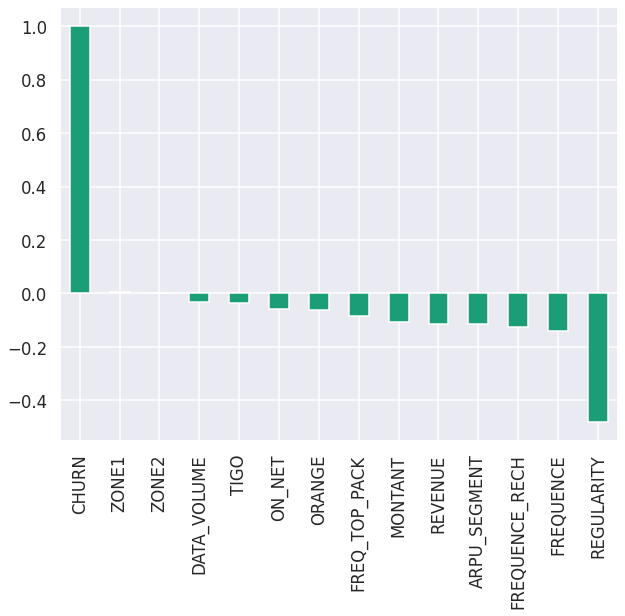

In [ ]:
# Visualisation de l'impact des variables
sns.set(style='darkgrid', context='talk', palette='Dark2')
plt.figure(figsize=(10,8))
data.corr()['CHURN'].sort_values(ascending = False).plot(kind='bar')

Ce graphe ne fait que confirmer une présence assez importante de valeurs manquantes des variables **ZONE1** et **ZONE2**.<br>
En d'autres termes, elles n'apportent pas vraiment d'informations.<br>

In [5]:
# On supprime la variable user_id car le numéro de chaque client est inutile chose dans l'étude
df = data.drop('user_id', axis =1)

In [6]:
# Dimension de notre dataset
df.shape

(1048575, 18)

Notre jeu de données comporte maintenant 1048575 lignes et 18 colonnes

##  **II.3. ANALYSE EXPLORATOIRE**  

Nous tenterons de chercher quels sont les principaux facteurs d'attrition ?

### **II.3.1. ANALYSE UNIVARIEE**

Dans cette section, nous nous intéressons des statistiques de bases de quelques variables susceptibles d'avoir un impact sur l'attrition clientèle.

In [ ]:
# Etude de la variable cible CHURN
df['CHURN'].unique()

array([0, 1])

On peut remarquer qu'on a que deux modalités pour notre variable cible.

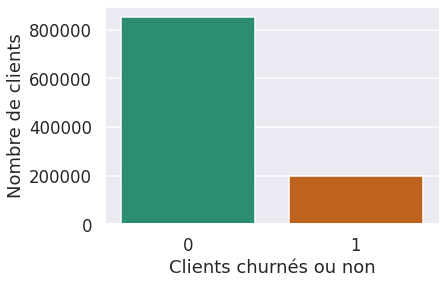

0    0.812318
1    0.187682
Name: CHURN, dtype: float64


In [ ]:
# Distribution de la variable cible
sns.countplot(x = 'CHURN',data = df)

plt.xlabel('Clients churnés ou non')
plt.ylabel("Nombre de clients")

plt.show()

print(df['CHURN'].value_counts(normalize =True))

On a 81% des clients qui n'ont pas churné et 18 % qui ont churné.
On peut donc affirmer que nos classes ne sont pas **équilibrées**.
On s'attend alors à utiliser plus-tard des métriques comme le **score-F1,la sensibilité ou la précision**.

In [ ]:
# Audit des variables catégorielles
df.select_dtypes('object').describe().T

,count,unique,top,freq
REGION,635141,14,DAKAR,249806
TENURE,1048575,8,K > 24 month,994587
MRG,1048575,1,NO,1048575
TOP_PACK,609188,126,All net 500F=2000F;5d,154760


On peut voir que la variable **MRG** n'a qu'une seule modalité.<br>
Toutefois, l'audit nous apprend que les clients les plus **représentatifs** résident à DAKAR, ils ont duré plus de 24 mois dans le réseau et ils n'ont jamais fait de vas, et leur **TOP_PACK** favorite est All-net. 

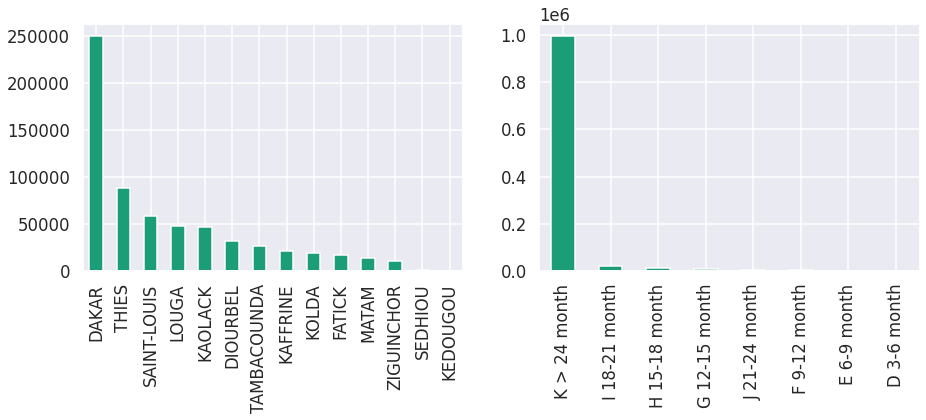

In [ ]:
# Distribution des variables qualitatives TENURE et REGION 
plt.figure(figsize=(15,10))

plt.subplot(221)
df['REGION'].value_counts().plot.bar()

plt.subplot(222)
df['TENURE'].value_counts().plot.bar()


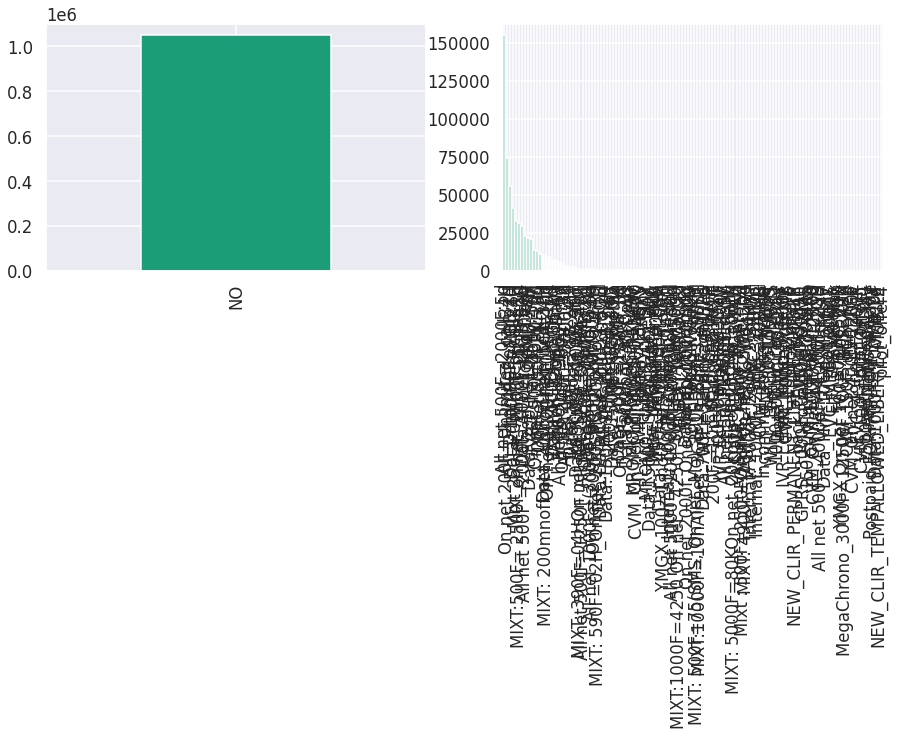

In [ ]:
# Distribution des variables qualitatives MRG et TOP_PACK 

plt.figure(figsize=(15,10))
plt.subplot(221)
df['MRG'].value_counts().plot.bar()

plt.subplot(222)
df['TOP_PACK'].value_counts().plot.bar()


D'apres ces graphes, on peut remarquer que la majorité des clients ont des durées supérieures à 24 mois dans le réseau, et ils sont beaucoup plus concentrés dans la région de DAKAR .<br>
La distribution de la variable **MRG** suit une ***loi uniforme***, alors l'hypothèse d'équiprobabilité, on peut pas tirer beaucoup d'informations sur cette variable.<br>
Pour le graphe de la variable **TOP_PACK**,il est difficile de s'énoncer sur cette variable.

In [ ]:
# Audit des variables numériques
df.select_dtypes(include =['int64','float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
MONTANT,679931.0,5538.217109,7147.712610,10.0,1000.0,3000.0,7350.0,470000.0
FREQUENCE_RECH,679931.0,11.541451,13.282298,1.0,2.0,7.0,16.0,133.0
REVENUE,694797.0,5514.798879,7199.856252,1.0,1000.0,3000.0,7387.0,532177.0
ARPU_SEGMENT,694797.0,1838.272454,2399.947652,0.0,333.0,1000.0,2462.0,177392.0
FREQUENCE,694797.0,13.990561,14.698701,1.0,3.0,9.0,20.0,91.0
DATA_VOLUME,532041.0,3367.127268,13227.148631,0.0,0.0,260.0,2888.0,1556829.0
ON_NET,665211.0,277.695893,873.530717,0.0,5.0,27.0,157.0,50809.0
ORANGE,612535.0,95.639485,207.059750,0.0,7.0,29.0,99.0,21323.0
TIGO,420459.0,23.038808,62.597335,0.0,2.0,6.0,20.0,3728.0
ZONE1,82630.0,8.100629,43.353739,0.0,0.0,1.0,3.0,4792.0


On peut remarquer que les valeurs minimales de plusieurs caractéristiques révèlent la présence de valeurs manquantes mises à zéros.

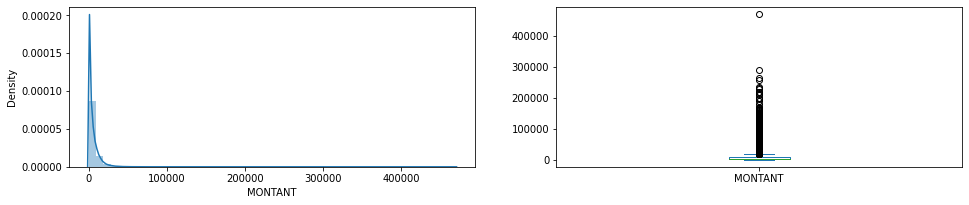

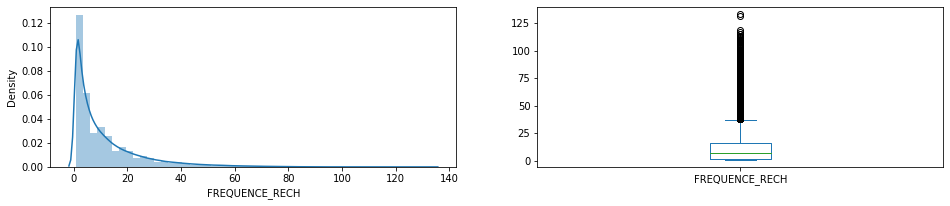

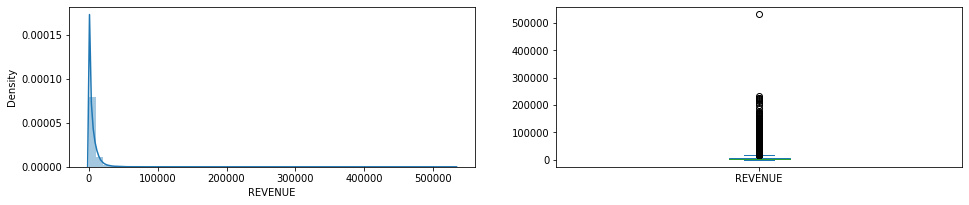

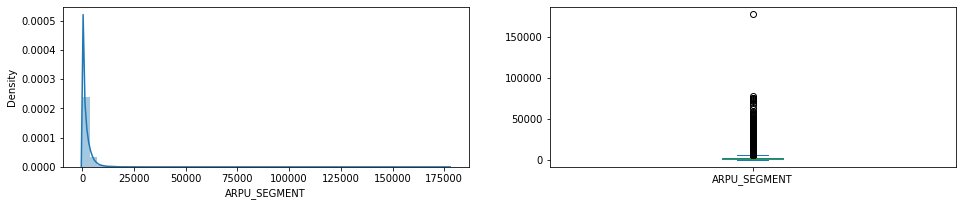

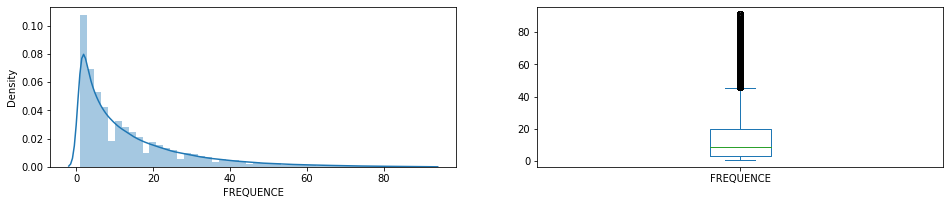

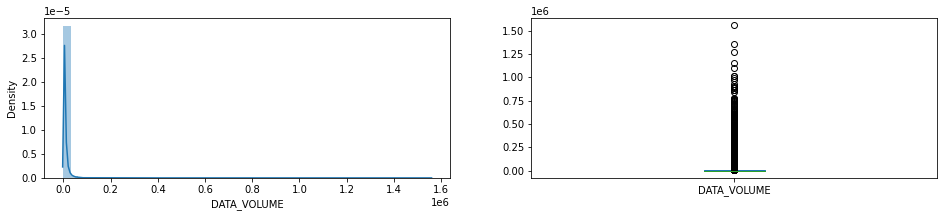

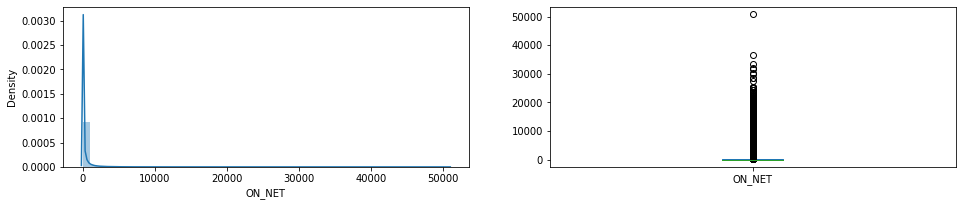

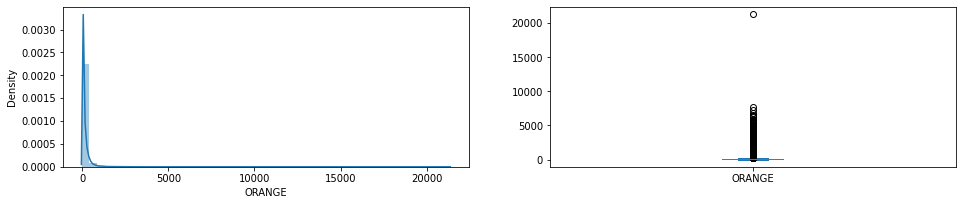

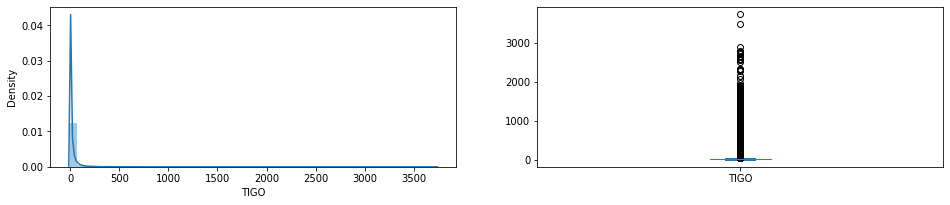

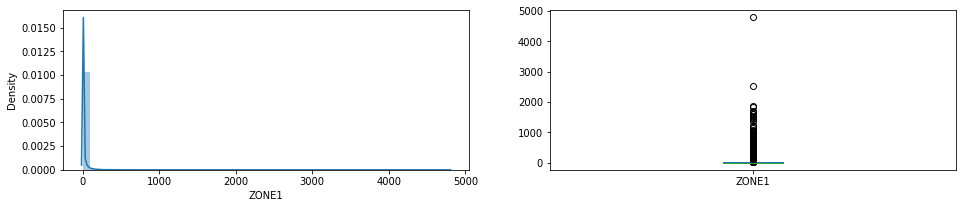

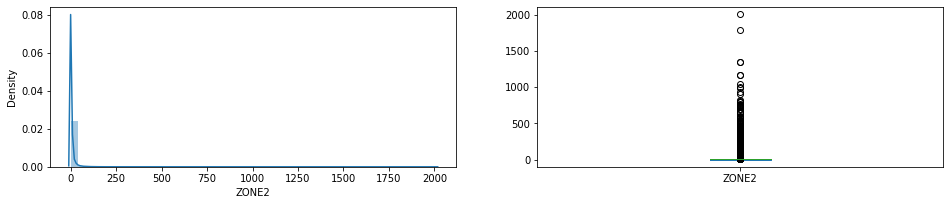

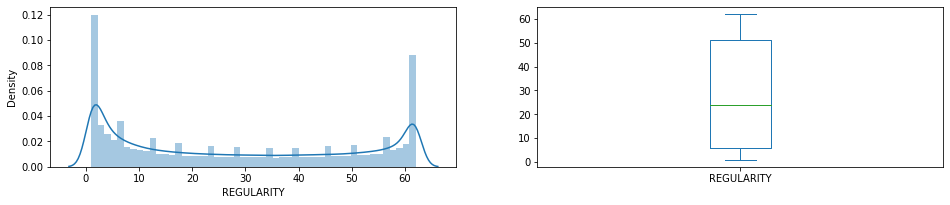

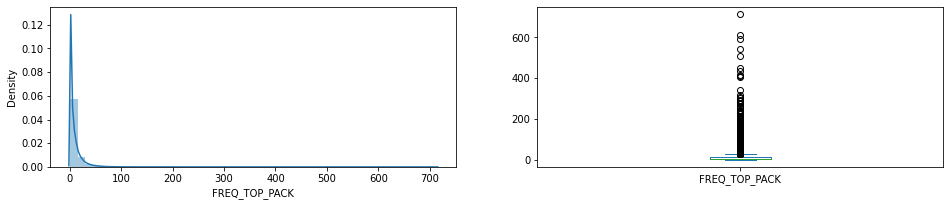

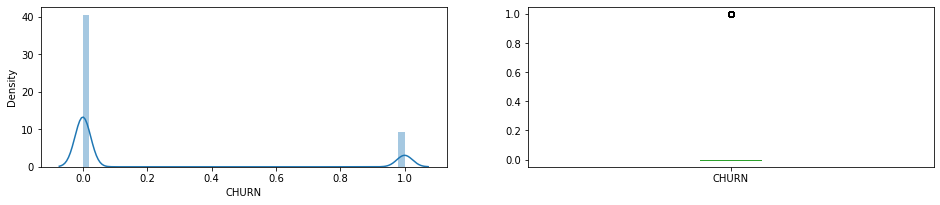

In [7]:
#Distribution des variables quantitatives
for col in df.select_dtypes(include =['number']):
    plt.subplot(321)
    sns.distplot(df[col])

    plt.subplot(322)
    df[col].plot.box(figsize=(16,10))
    plt.suptitle('')
    plt.show()

On peut remarquer parexemple que :
- Le **graphe DATA_VOLUME** montre que la majorité des clients consomment de faibles volumes de données et une distribution asymétrique.<br>
- Le **graphe FREQUENCE_RECH** montre que la majorité des clients font de faibles recharges et une distribution asymétrique.<br>
- Le **graphe MONTANT** montre que la majorité des clients possèdent de faibles montants de recharge et une distribution asymétrique.<br>
- Le **graphe REVENUE** montre qu'aussi la majorité des clients possèdent de faibles revenus mensuels et une distribution asymétrique.<br>

En résumé, tous les graphes montrent des distributions asymétriques, ceci dit alors qu'on utilisera **l'imputation par la médiane** pour les valeurs manquantes.

### **II.3.2. ANALYSE BIVARIEE**


On essaie d'examiner comment deux variables sont liées l'une à l'autre. Il peut s'agir de deux variables numériques, de deux catégorielles ou d'un mélange des deux variables.En d'autres termes, on essaie de savoir si :
- Le montant de recharge est-t-il lié à l’attrition	?
- La fréquence de recharger	est-elle liée à l’attrition	?
- Le revenu a-t-il un impact sur l’attrition	?
- Le volume de données a un impact sur l’attrition	?
- Le nombre d'appels vers le réseau Orange est-t-il lié à l’attrition ?
- Le nombre de fois que le client est actif pendant 90 jours est-il lié à l’attrition ?	
- La fréquence l’attrition ?	
- Le nombre de fois que le client a activé les top packages est-il lié l’attrition ?
- L'ancienneté au réseau est-elle liée à l'attrition ?
- Quelles sont les variables numériques corrélées ?	
- Quelles sont les variables qualitatives corrélées ?
- Quelles sont les variables numériques et qualitatives corrélées ?	

**ETUDE DE RELATION ENTRE CHURN ET QUELQUES VARIABLES NUMERIQUES**

In [ ]:
vars = df[['MONTANT', 'FREQUENCE_RECH', 'REVENUE','DATA_VOLUME','ORANGE',
                     'REGULARITY','FREQ_TOP_PACK']]

In [ ]:
# Création de sous ensemble des clients churnés et non churnés.
Churn_1 = df[df['CHURN']== 1]
Churn_0 = df[df['CHURN']== 0]

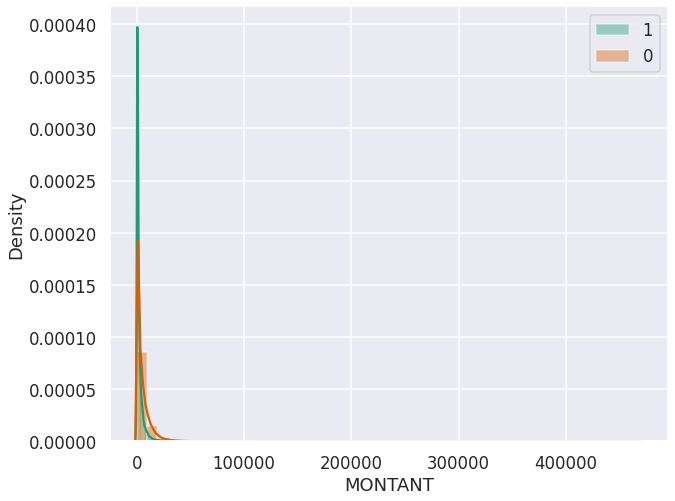

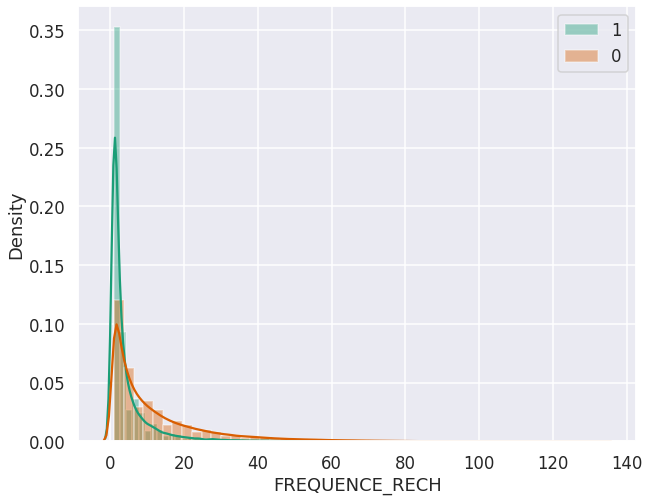

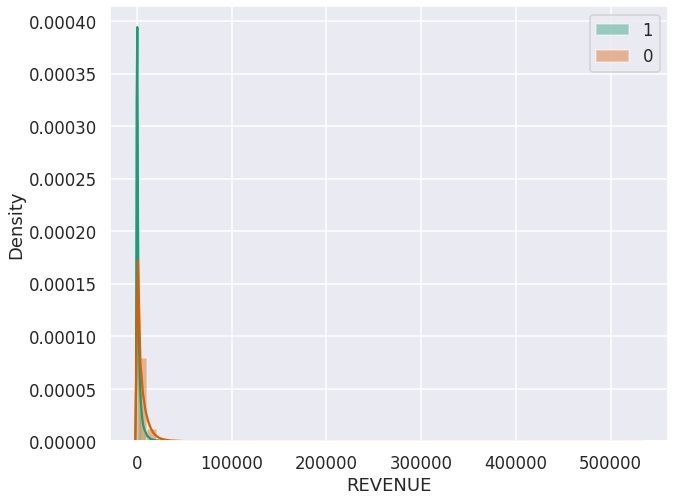

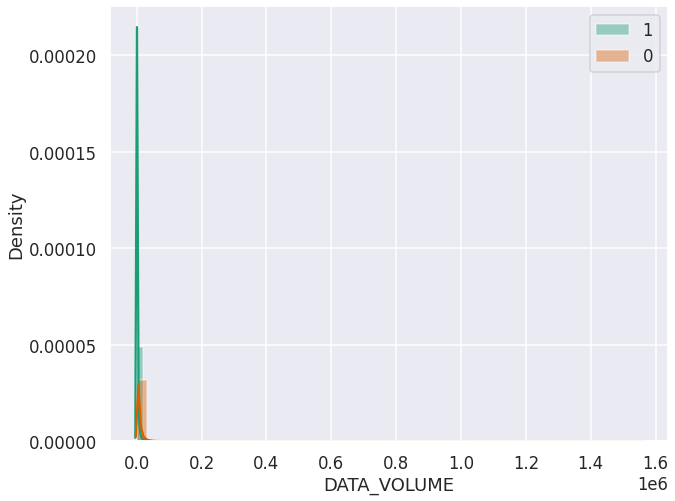

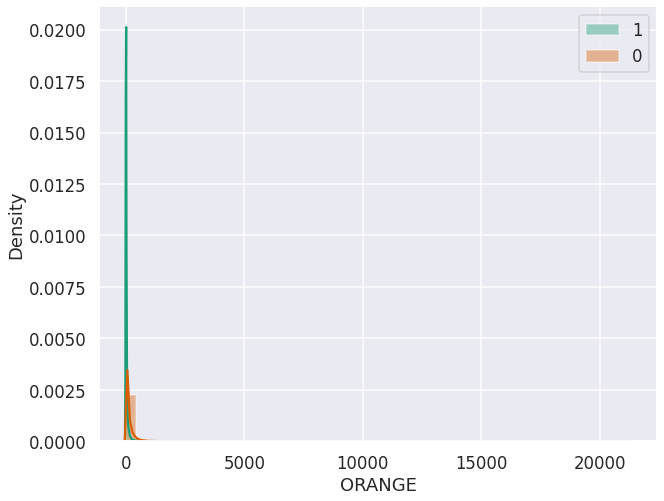

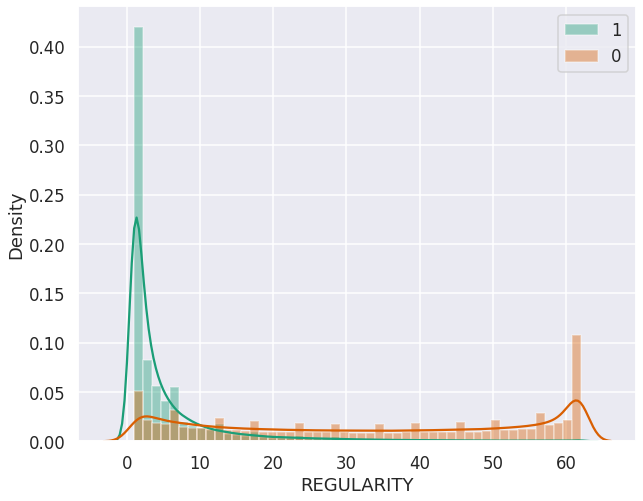

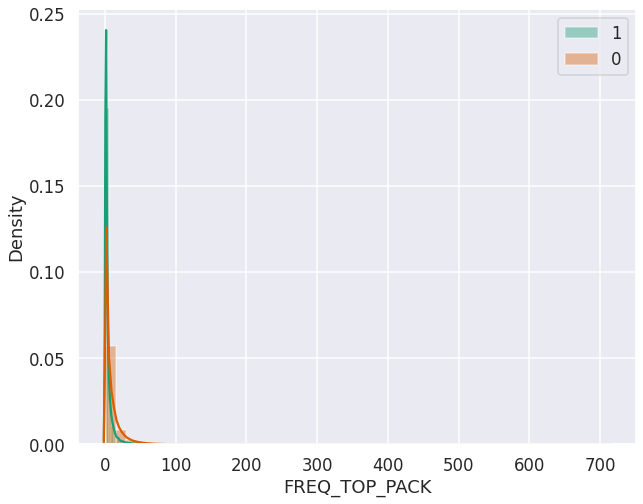

In [ ]:
for col in vars:
    plt.figure(figsize =(10,8))
    sns.distplot(Churn_1[col], label='1')
    sns.distplot(Churn_0[col], label='0')
    plt.legend()

On peut remarquer parexemple que :
- Le **graphe CHURN vs MONTANT** montre que les clients churnés sont en majorité chez les abonnés possédant de montants de recharges faibles.<br>
- Le **graphe CHURN vs FREQUENCE_RECH** montre que les clients churnés sont en majorité chez les abonnés faisant de faibles fréquences de recharges.<br>
- Le **graphe CHURN vs REVENUE** montre que les clients perdus sont en majorité chez les abonnés possédant de faibles revenues.<br>
- Le **graphe CHURN vs DATA_VOLUME** montre qu'aussi le churn est plus évident chez les abonnés utilisant de faibles volume de données.<br>
- Le **graphe CHURN vs ORANGE** montre que les clients churnés sont en majorité chez les abonnés effectuant le plus grand nombre d'appels vers le réseau Orange.<br>
- Le **graphe CHURN vs REGULARITY** montre que la perte de clients ou churn est plus importante chez les abonnés ayant une faible régularity( nombre de fois que le client est actif pendant 90).<br>
- Le **graphe CHURN vs FREQ_TOP_PACK** montre que la perte de clients est plus importante chez les abonnés ayant de faibles fréquences d'activation des packages TOP_PACK.<br>

**ETUDE DE RELATION ENTRE CHURN ET LA VARIABLE QUALITATIVE job**

In [1]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.TENURE, data =df, hue = 'CHURN')

pd.crosstab(df['TENURE'],df['CHURN'], margins=True)

NameError: name 'plt' is not defined

D'après le tableau croisé de TENURE et CHURN,quand on fait le rapport entre les churnés **1** sur le total des clients **All** dans le tableau ,on peut remarquer que le phénomene de Churn est plus visible chez les abonnés avec une ancienneté de **12 à 15 mois**, et **18 à 21 mois** dans le réseau.

**ETUDE DE RELATION ENTRE CHURN ET LA VARIABLE QUALITATIVE REGION**

CHURN,0,1,All
REGION,,,
DAKAR,244956,4850,249806
DIOURBEL,31551,881,32432
FATICK,17371,251,17622
KAFFRINE,21249,154,21403
KAOLACK,45997,1110,47107
KEDOUGOU,485,22,507
KOLDA,18557,211,18768
LOUGA,47397,789,48186
MATAM,13733,270,14003


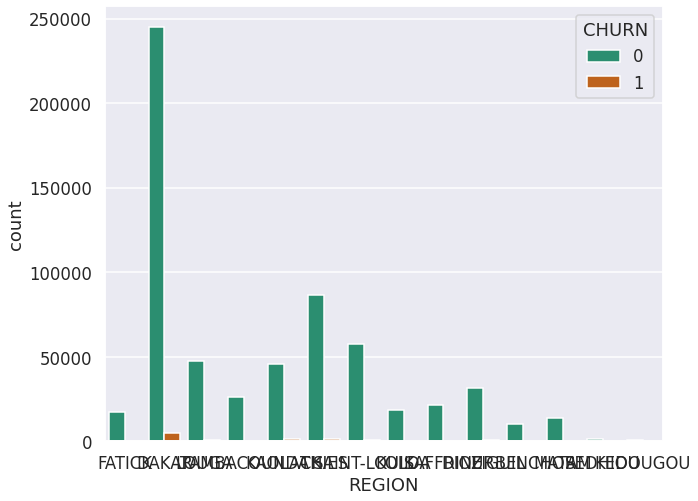

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.REGION, data =df, hue = 'CHURN')

pd.crosstab(df['REGION'],df['CHURN'], margins=True)

D'après le tableau croisé de REGION et CHURN,quand on fait le rapport entre les churnés **1** sur le total des clients **All** dans le tableau ,on peut remarquer que le phénomene de Churn est plus visible chez les abonnés avec une ancienneté de **SEDHIOU**, et **KEDOUGOU** dans le réseau..<br>

**ETUDE DE RELATION ENTRE CHURN ET LA VARIABLE QUALITATIVE MRG**

CHURN,0,1,All
MRG,,,
NO,851776,196799,1048575
All,851776,196799,1048575


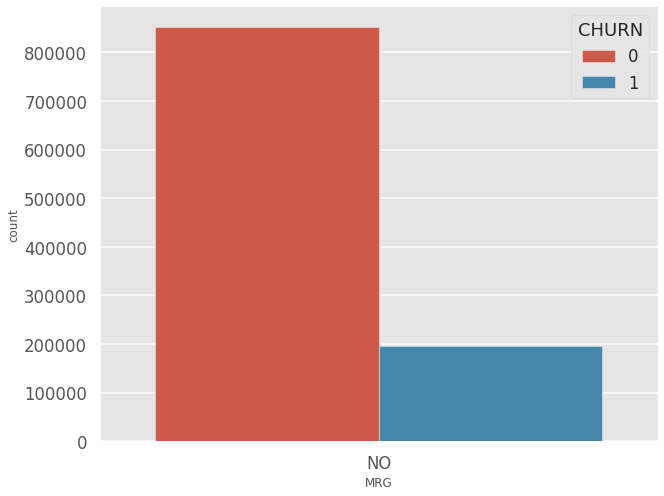

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x=df.MRG, data =df, hue = 'CHURN')

pd.crosstab(df['MRG'],df['CHURN'], margins=True)

On peut remarquer que les clients qui font des vas, ils sont majoritairement ceux qui n'ont pas churné.

**ETUDE DE CORRELATION ENTRE LES VARIABLES QUANTITATIVES**

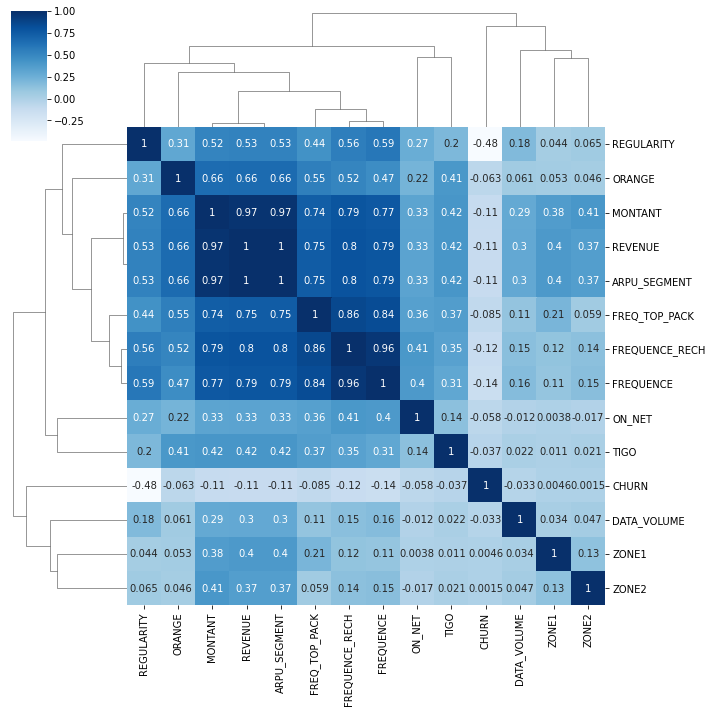

In [ ]:
# Graphe de corrélation entre les variables quantitatives

sns.clustermap(df.corr(),annot =True,cmap='Blues')

Ce graphe crée des groupes de variables corrélées entre elles.
Plus la corrélation est proche de **1**, plus elles sont corrélées positivement.<br>
Parexemple, les variables **MONTANT**,**REVENUE** et **ARPU_SEGMENT**, ont une corrélation positive.<br>
Ceci dit qu'on pourrait supprimer dans l'étape du processing la variable **ARPU_SEGMENT**, et conserver le **REVENUE**.De meme que les variables **FREQUENCE_RECH** et **FREQUENCE**, elles sont corrélées positivement. <br>

L'intérêt des tests de corrélation est d'apporter plus de pertinence et fiabilité aux coefficients de corrélation. Il existe différents test de corrélation, comme celui de Pearson, on pouvait aussi l'utiliser pour étudier les corrélations entre les variables quantitatives. <br>

**ETUDE DE CORRELATION ENTRE LES VARIABLES QUALITATIVES ( Test d'indépendance de Khi²)**<br>

On pose les hypothèses de départ : <br>
H0 : Variables indépendantes si **p-value > 5%**. <br>
H1 : Variables non indépendantes si **p-value < 5%**. <br>

In [1]:
def test_khi2(df, var1, var2):
    table = pd.crosstab(df[var1],df[var2])
    resultats = chi2_contingency(table)
    print("{} et {}".format(var1,var2))
    print("Statistique de test : {}".format(resultats[0]))
    print("   Degré de liberté : {}".format(resultats[2]))
    print("            P_value : {}".format(resultats[1]))
    if ( resultats[1] < 0.05):
        print("{} et {} ne sont pas indépendantes".format(var1,var2))
    else:
        print("{} et {} sont indépendantes".format(var1,var2))
    print("\n \n")
    pass

In [ ]:
#Test Statistique du Khi-deux
from scipy.stats import chi2_contingency
liste = []
for var1 in df.select_dtypes('object'):
    liste.append(var1)
    for var2 in [var for var in df.select_dtypes('object') if var not in liste ]:
        test_khi2(df,var1,var2)

REGION et TENURE
Statistique de test : 2423.3478593352957
   Degré de liberté : 91
            P_value : 0.0
REGION et TENURE ne sont pas indépendantes

 

REGION et MRG
Statistique de test : 0.0
   Degré de liberté : 0
            P_value : 1.0
REGION et MRG sont indépendantes

 

REGION et TOP_PACK
Statistique de test : 75817.1134871979
   Degré de liberté : 1456
            P_value : 0.0
REGION et TOP_PACK ne sont pas indépendantes

 

TENURE et MRG
Statistique de test : 0.0
   Degré de liberté : 0
            P_value : 1.0
TENURE et MRG sont indépendantes

 

TENURE et TOP_PACK
Statistique de test : 10049.575371952853
   Degré de liberté : 875
            P_value : 0.0
TENURE et TOP_PACK ne sont pas indépendantes

 

MRG et TOP_PACK
Statistique de test : 0.0
   Degré de liberté : 0
            P_value : 1.0
MRG et TOP_PACK sont indépendantes

 



**ETUDE DE CORRELATION ENTRE LES VARIABLES QUALITATIVES ET QUANTITATIVES**

In [ ]:
def test_anova(df, var1, var2):
    results = statsmodels.formula.api.ols('{} ~ {}'.format(var1,var2), data = df).fit()
    table = statsmodels.api.stats.anova_lm(results)
    print("{} et {}".format(var1,var2))
    print("Statistique de test : {}".format(table['F'][0]))
    print("   Degré de liberté : {}".format(table['df'][0]))
    print("            P_value : {}".format(table['PR(>F)'][0]))
    if ( table['PR(>F)'][0] < 0.05):
        print("{} et {} ne sont pas indépendantes".format(var1,var2))
    print("\n \n")
    pass

In [ ]:
variables= ['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE','ARPU_SEGMENT','FREQUENCE', 
            'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO','ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 
            'TOP_PACK', 'FREQ_TOP_PACK']

from scipy.stats import chi2_contingency
liste = []
for var1 in df.select_dtypes('object') :
    liste.append(var1)
    for var2 in [var for var in variables if var not in liste ]:
        test_khi2(df,var1,var2)

REGION et TENURE
Statistique de test : 2423.3478593352957
   Degré de liberté : 91
            P_value : 0.0
REGION et TENURE ne sont pas indépendantes

 

REGION et MONTANT
Statistique de test : 67029.69710691298
   Degré de liberté : 51363
            P_value : 0.0
REGION et MONTANT ne sont pas indépendantes

 

REGION et FREQUENCE_RECH
Statistique de test : 14746.287691168818
   Degré de liberté : 1521
            P_value : 0.0
REGION et FREQUENCE_RECH ne sont pas indépendantes

 

REGION et REVENUE
Statistique de test : 333203.6314430466
   Degré de liberté : 398138
            P_value : 1.0
REGION et REVENUE sont indépendantes

 

REGION et ARPU_SEGMENT
Statistique de test : 160078.21577457705
   Degré de liberté : 177307
            P_value : 1.0
REGION et ARPU_SEGMENT sont indépendantes

 

REGION et FREQUENCE
Statistique de test : 15857.047050681023
   Degré de liberté : 1170
            P_value : 0.0
REGION et FREQUENCE ne sont pas indépendantes

 

REGION et DATA_VOLUME
Stati

TOP_PACK et TIGO
Statistique de test : 125363.4376387395
   Degré de liberté : 110565
            P_value : 3.170523273660383e-200
TOP_PACK et TIGO ne sont pas indépendantes

 

TOP_PACK et ZONE1
Statistique de test : 81712.98777112097
   Degré de liberté : 41400
            P_value : 0.0
TOP_PACK et ZONE1 ne sont pas indépendantes

 

TOP_PACK et ZONE2
Statistique de test : 117079.03340169488
   Degré de liberté : 30102
            P_value : 0.0
TOP_PACK et ZONE2 ne sont pas indépendantes

 

TOP_PACK et REGULARITY
Statistique de test : 39514.40326799259
   Degré de liberté : 7625
            P_value : 0.0
TOP_PACK et REGULARITY ne sont pas indépendantes

 

TOP_PACK et FREQ_TOP_PACK
Statistique de test : 159121.44966357533
   Degré de liberté : 26250
            P_value : 0.0
TOP_PACK et FREQ_TOP_PACK ne sont pas indépendantes

 



### **II.3.3. ANALYSE MULTIVARIEE**
On essaie d'examiner comment l'attrition est liée au moins deux varibles explicatives.En d'autres termes, on essaie de savoir si :
- Le revenu et le volume de données sont-t-ils liés à l’attrition	?
- Le montant de recharges et la fréquence de recharges sont-ils liés à l’attrition	?
- La régularité et la fréquence de recharges sont-elles liées à l’attrition	?
- Les appels éffectués vers les opérateurs Tigo ou Orange sont-t-ils liés à l’attrition	?
- Le nombre d'appels de la Zone1 ou Zone2 sont-t-ils liés à l'attrition ?

**ETUDE DE CORRELATION ENTRE LA VARIABLE CHURN vs DATA_VOLUME et REVENUE**

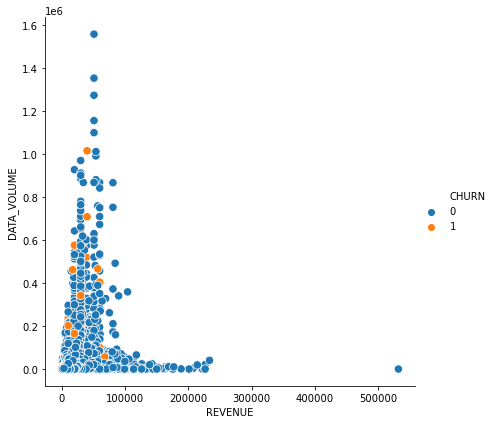

In [ ]:
sns.relplot(x = "REVENUE", y = "DATA_VOLUME", hue = "CHURN", data = df, height = 6, s = 70)

On peut remarquer que la majorité des clients qui ont churné, ils sont plus visibles chez les abonnés possèdant de faibles revenues et utilisant de faibles volumes de données.

**ETUDE DE CORRELATION ENTRE LA VARIABLE CHURN vs MONTANT et FREQUENCE_RECH**

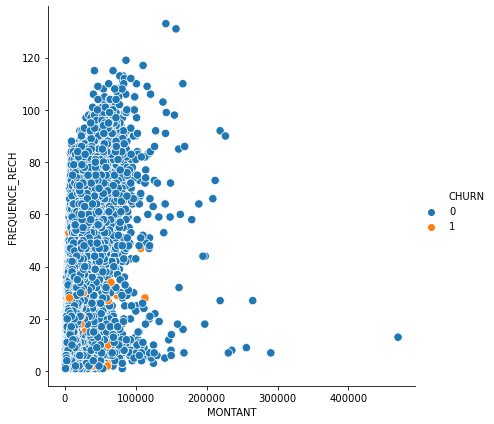

In [ ]:
sns.relplot(x = "MONTANT", y = "FREQUENCE_RECH", hue = "CHURN", data = df, height = 6, s = 70)

Le graphe montre que les clients churnés sont en majorité chez les abonnés possédant de montants de recharges faibles et faisant de faibles recharges.<br>

**ETUDE DE CORRELATION ENTRE LA VARIABLE CHURN vs REGULARITE et FREQUENCE_RECH**

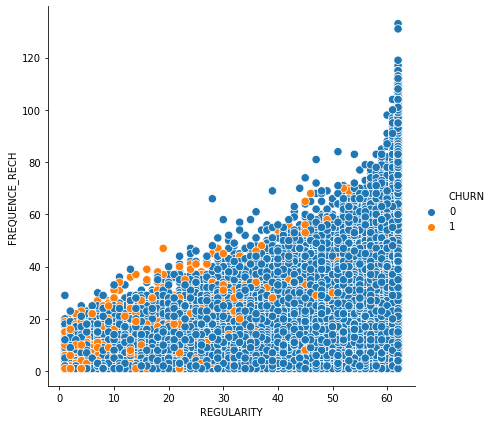

In [ ]:
sns.relplot(x = "REGULARITY", y = "FREQUENCE_RECH", hue = "CHURN", data = df, height = 6, s = 70)

Ce graphe confirme que les clients qui ont churné, sont les abonnés faisant de faibles recharges et ayant de faibles régularités. 

**ETUDE DE CORRELATION ENTRE LA VARIABLE CHURN vs TIGO et ORANGE**

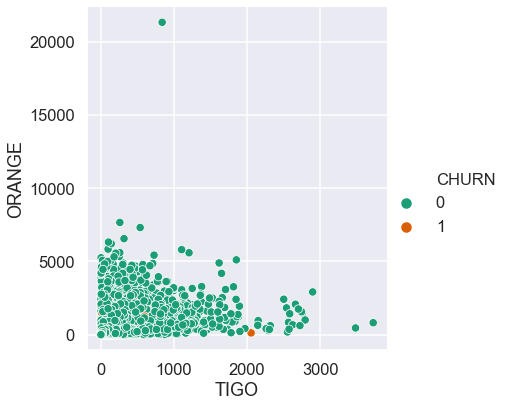

In [ ]:
sns.relplot(x = "TIGO", y = "ORANGE", hue = "CHURN", data = df, height = 6, s = 70)

Difficile à interpréter mais on peut noter que le client a plus de chance de churner s'il passe des appels vers Tigo ou Orange.

**ETUDE DE CORRELATION ENTRE LA VARIABLE CHURN vs ZONE1 et ZONE2**

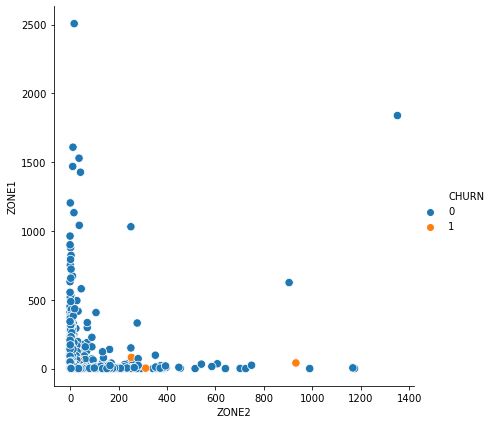

In [ ]:
sns.relplot(x = "ZONE2", y = "ZONE1", hue = "CHURN", data = df, height = 6, s = 70)

Ce graphe montre que le phénomène du Churn est plus observé au niveau de la Zone2.Toutefois,ces deux variables ont plus de 90% de valeurs manquantes.

## CONCLUSION 


Après l'étape de l'analyse exploratoire, nous pouvons tirer les conclusions suivantes: 
- La variable cible **CHURN**, n'est pas équilibrée.On s'attend alors à utiliser plus-tard une métrique d'évaluation comme le **score-F1,la sensibilité ou la précision**.<br>
- Il y'a certaines variables jugées non pertinentes que nous devrions supprimer, et il en est de meme d'autres variables qui doivent subir d'imputation par la moyenne ou par le mode ou par la médiane.Parexemple les variables **ZONE1 et ZONE2** présentant plus de 90 % de NAN, doivent etre supprimées.<br>
 Il en est de meme que les variables **ARPU_SEGMENT,MRG et TOP_PACK** qui sont non porteuses d'information d'après nos tests de corrélations <br>
- Tous les graphes montrent des distributions asymétriques, ceci dit alors qu'on utilisera **l'imputation par la médiane** pour les valeurs manquantes..<br>
- La majorité des clients sont beaucoup plus concentrés dans les regions de SEDHIOU et KEDOUGOU, et ont des durées d'ancienneté de plus de 12 à 15 mois. Ils possèdent de faibles montants de recharges et de revenues, ils consomment moins de volumes de données et font également de faibles recharges.<br>
- Le phénomène du Churn est plus visible chez les abonnés ayant de faibles montants,de faibles revenues et ils font de faibles recharges avec une consommation de volumes de données ainsi que de faibles appels vers le réseau Orange.Leur régularité n'est pas aussi importante .<br>
- On note aussi des corrélations entre certaines variables prédictives comme montant de recharges et revenue.De meme que les variables fréquence et fréquence de recharges sont corrélées. <br>
- Il est à noter aussi qu'il y'a attrition chez les abonnés qui passent des appels de Tigo vers Orange.<br>

# **`III. PRETRAITEMENT DES DONNEES`**

##  **III.1. SUPPRESSION DE VARIABLES NON PERTINENTES** 


D'après nos informations tirées dans l'analyse exploratoire, nous allons supprimer les variables jugées non pertinentes pour évaluer la prédiction de l'attrition.<br>
Parexemple, la variable **user_id** ne contenant que le numéro du client ne nous renseigne pas grande chose si ce client a churné.<br> De meme que les variables **ZONE1** et **ZONE2** présentant des valeurs manquantes très élevées plus de 90%.
La variable **ARPU_SEGMENT** qui est le revenu mensuel, est jugée non pertinente car c'est une ***redondance*** de la variable **REVENU**,et enfin les variables **TOP_PACK** et **MRG**.

In [8]:
# Suppression
df_new = df.drop(['ARPU_SEGMENT','TOP_PACK','ZONE1','ZONE2','MRG'],axis = 1) 

In [9]:
df_new.head()

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,FREQ_TOP_PACK,CHURN
0,FATICK,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,8.0,0
1,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,1
2,NaN,K > 24 month,3600.0,2.0,1020.0,2.0,NaN,90.0,46.0,7.0,17,1.0,0
3,DAKAR,K > 24 month,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,62,11.0,0
4,DAKAR,K > 24 month,1000.0,1.0,985.0,1.0,NaN,39.0,24.0,NaN,11,2.0,0


In [10]:
df_new.shape

(1048575, 13)

##  **III.2. ETUDE DES VALEURS MANQUANTES** 

In [11]:
# Pourcentages des valeurs manquantes de chacune des variables de notre dataset
(df_new.isna().sum()/df_new.shape[0]).sort_values(ascending = False)*100

TIGO              59.901867
DATA_VOLUME       49.260568
FREQ_TOP_PACK     41.903250
ORANGE            41.584055
REGION            39.428176
ON_NET            36.560475
MONTANT           35.156665
FREQUENCE_RECH    35.156665
REVENUE           33.738931
FREQUENCE         33.738931
TENURE             0.000000
REGULARITY         0.000000
CHURN              0.000000
dtype: float64

**TEST DE L'IMPACT DE LA SUPPRESSION DES VALEURS MANQUANTES**

In [ ]:
# Copie de notre dataset pour tester l'impact de la suppression des valeurs manquantes
df_ = df_new.copy()
df_.shape

(1048575, 13)

In [ ]:
# Suppression des valeurs manquantes
df_ = df_.dropna()

In [ ]:
df_.shape

(212928, 13)

On peut remarquer que si on procède à une suppression des valeurs manquantes, on risque de perdre énormément de données presque 80% de notre dataset.<br>
Alors, on va procéder à une **imputation** des données soit par la **médiane** ou la **moyenne** ou par le **mode**.

**IMPUTATION PAR LA MOYENNE OU PAR LA MEDIANE OU PAR LE MODE**
- **Imputation par la moyenne** : Cette méthode est applicable s'il n'y a pas de ***valeurs abérrantes*** dans notre dataset<br>.
- **Imputation par la médiane** : Cette méthode est applicable s'il y a de ***valeurs abérrantes*** dans notre dataset<br>.
- **Imputation par le mode** : Cette méthode est utilisée pour imputer les variables qualitatives<br>.

D'après les informations tirées dans l'analyse exploratoire, tous les graphes montrent des distributions asymétriques, ceci dit alors qu'on utilisera **l'imputation par la médiane** pour les valeurs manquantes des variables quantitatives..<br>
Il est important de préciser nos valeurs manquantes **NAN**, qui sont des valeurs manquantes **standards**.<br>
Cependant, on va procéder à une **imputation par le mode** pour la variable **REGION**.

In [ ]:
df_new.columns

Index(['REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE', 'FREQUENCE',
       'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO', 'REGULARITY',
       'FREQ_TOP_PACK', 'CHURN'],
      dtype='object')

In [12]:
vars_quanti = ['MONTANT','FREQUENCE_RECH','REVENUE','FREQUENCE','DATA_VOLUME',
    'ON_NET','ORANGE','TIGO','FREQ_TOP_PACK']  

In [13]:
# Imputation par la médiane des variables quantitatives de vars
for col in vars_quanti :
    df_new[col] = df_new[col].fillna(df_new[col].median())

In [14]:
# Imputation par le mode de la variable qualitative REGION

df_new['REGION'] = df_new['REGION'].fillna(df_new['REGION'].mode()[0])

In [15]:
# Vérification de l'Imputation
df_new.isna().sum()

REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
REGULARITY        0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

On peut remarquer que toutes nos variables de valeurs manquantes, ont été imputées.

##  **III.3. ENCODAGE DES VARIABLES CATEGORIELLES** 

In [16]:
# Encodage de la variable REGION par un OneHot Encoding
df_encoded = pd.get_dummies(df_new[['REGION']], drop_first = False)

In [17]:
df_encoded.head()

,REGION_DAKAR,REGION_DIOURBEL,REGION_FATICK,REGION_KAFFRINE,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
# Suppression de la variable REGION deja encodée
df_REG= df_new.drop(df_new[['REGION']], axis = 1)

In [19]:
# Concaténation des variables encodées et le dataset, en un dataset df_clean
df_clean = pd.concat([df_REG,df_encoded], axis = 1)

In [20]:
df_clean.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,K > 24 month,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,...,0,0,0,0,0,0,0,0,0,0
1,I 18-21 month,3000.0,7.0,3000.0,9.0,260.0,27.0,29.0,6.0,4,...,0,0,0,0,0,0,0,0,0,0
2,K > 24 month,3600.0,2.0,1020.0,2.0,260.0,90.0,46.0,7.0,17,...,0,0,0,0,0,0,0,0,0,0
3,K > 24 month,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,62,...,0,0,0,0,0,0,0,0,0,0
4,K > 24 month,1000.0,1.0,985.0,1.0,260.0,39.0,24.0,6.0,11,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# Encodage de la variable TENURE
df_clean['TENURE'] = df_clean.TENURE.replace(['D 3-6 month','E 6-9 month','F 9-12 month','G 12-15 month',
                 'H 15-18 month','I 18-21 month','J 21-24 month','K > 24 month'],[1,2,3,4,5,6,7,8])

In [22]:
df_clean.TENURE.value_counts()

8    994587
6     22152
5     12706
4      7251
7      6127
3      4475
2       891
1       386
Name: TENURE, dtype: int64

In [23]:
df_clean.shape

(1048575, 26)

##  **III.4. PARTITIONNEMENT DU DATASET EN DONNEES DE TRAIN ET DE TEST**

In [24]:
df_clean.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
0,8,4250.0,15.0,4251.0,17.0,4.0,388.0,46.0,1.0,54,...,0,0,0,0,0,0,0,0,0,0
1,6,3000.0,7.0,3000.0,9.0,260.0,27.0,29.0,6.0,4,...,0,0,0,0,0,0,0,0,0,0
2,8,3600.0,2.0,1020.0,2.0,260.0,90.0,46.0,7.0,17,...,0,0,0,0,0,0,0,0,0,0
3,8,13500.0,15.0,13502.0,18.0,43804.0,41.0,102.0,2.0,62,...,0,0,0,0,0,0,0,0,0,0
4,8,1000.0,1.0,985.0,1.0,260.0,39.0,24.0,6.0,11,...,0,0,0,0,0,0,0,0,0,0


Cette étape consiste à subdiviser le jeu de données en données d'entrainement et de test

In [25]:
# Affectation de la matrice de variables explicatives à X et de la cible à y

X = df_clean.drop('CHURN', axis = 1)
y = df_clean['CHURN']

In [26]:
# Subdivision des données en 80% pour les données Train et 20% pour les données Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 42)

In [27]:
print("Dimensions X_train :", X_train.shape)
print("Dimensions y_train :", y_train.shape)
print("Dimensions X_test :", X_test.shape)
print("Dimensions y_test :", y_test.shape)

Dimensions X_train : (838860, 25)
Dimensions y_train : (838860,)
Dimensions X_test : (209715, 25)
Dimensions y_test : (209715,)


In [28]:
# Aperçu
X_train.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,REGULARITY,...,REGION_KAOLACK,REGION_KEDOUGOU,REGION_KOLDA,REGION_LOUGA,REGION_MATAM,REGION_SAINT-LOUIS,REGION_SEDHIOU,REGION_TAMBACOUNDA,REGION_THIES,REGION_ZIGUINCHOR
408561,8,1850.0,4.0,1849.0,8.0,156.0,0.0,13.0,6.0,32,...,0,0,0,0,0,0,0,0,0,0
70143,8,4000.0,7.0,4000.0,7.0,260.0,50.0,85.0,0.0,18,...,0,0,0,0,0,0,0,0,0,1
708782,8,500.0,3.0,902.0,4.0,260.0,125.0,11.0,0.0,26,...,0,0,0,0,0,1,0,0,0,0
572694,8,3000.0,6.0,3502.0,10.0,0.0,27.0,41.0,16.0,22,...,0,0,0,0,0,0,0,0,0,0
774181,5,5700.0,17.0,5068.0,18.0,260.0,602.0,71.0,6.0,60,...,0,0,0,1,0,0,0,0,0,0


# **`IV. MODELISATION STATISTIQUE`**

Dans cette partie, nous allons utiliser un arbre de décision, qui est une technique de classification.

##  **IV.1. LANCEMENT DU MODELE**

Dans cette partie, nous avons choisi **arbre de décision** comme outil de modélisation.<br>

L'arbre de décision est un outil de modélisation prédictive qui peut être appliqué dans de nombreux domaines. Les arbres de décision peuvent être construits par une approche algorithmique qui peut diviser l'ensemble de données de différentes manières en fonction de différentes conditions. Les décisions trees sont les algorithmes les plus puissants qui entrent dans la catégorie des algorithmes supervisés.<br>
Ils peuvent être utilisés pour les tâches de classification et de régression. Les deux principales entités d'un arbre sont les nœuds de décision, où les données sont divisées et partent, où nous avons obtenu le résultat.

In [29]:
# Instanciation de notre algorithme d'apprentissage
model = DecisionTreeClassifier(max_depth = 4,ccp_alpha = 0.001,criterion ='gini')

# Apprentissage: construction du modèle prédictif

model.fit(X_train, y_train)

# Step 4: Test de la précision du modèle
y_pred = model.predict(X_test)

##  **IV.2. EVALUATION DE LA PERFORMANCE DU MODELE**

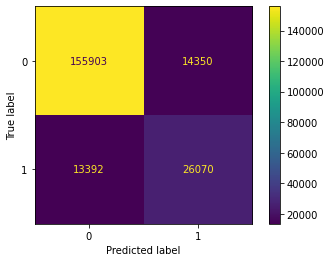

In [30]:
# Matrice de confusion 
plot_confusion_matrix(model,X_test,y_test,values_format ='d')

On peut remarquer que parmi les 155903 clients ***non churnés***, le modèle en a mal classé 14350 clients en leurs considérant comme étant des clients ***churnés***.<br>
Parmis, les 26070 clients qui sont ***churnés***, le modèle en a mal classé 13392 clients, en leurs considérant comme étant des clients ***non churnés***.

In [31]:
# Rapport de classification
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92    170253
           1       0.64      0.66      0.65     39462

    accuracy                           0.87    209715
   macro avg       0.78      0.79      0.79    209715
weighted avg       0.87      0.87      0.87    209715



Ceci est un rapport des differents métriques.

In [37]:
# Calcul de la précision
print("Précision:",precision_score(y_test, y_pred, average='micro')*100)

# Calcul du recall
print("Recall:",recall_score(y_test, y_pred, average='micro')*100)

# Calcul du F1-Score
print("F1-Score:",f1_score(y_test, y_pred, average='micro')*100)

Précision: 86.77157094151586
Recall: 86.77157094151586
F1-Score: 86.77157094151586


On peut remarquer que notre modèle présente 86.77% de taux de précision, de Recall et F1-Score

**VARIABLES LES PLUS PERTINENTES**

In [ ]:
model.feature_importances_

array([0.12750791, 0.        , 0.02220085, 0.        , 0.        ,
       0.        , 0.        , 0.00935613, 0.        , 0.        ,
       0.84093511, 0.        ])

In [32]:
# Pourcentage des variables les plus pertinentes selon le modèle
variables_perti = pd.DataFrame(sorted(zip(X_train.columns,np.round(100*model.feature_importances_,2))), 
                               columns=['Variables','% de Pertinences'])
variables_perti

,Variables,% de Pertinences
0,DATA_VOLUME,0.00
1,FREQUENCE,0.00
2,FREQUENCE_RECH,0.00
3,FREQ_TOP_PACK,0.00
4,MONTANT,2.26
5,ON_NET,0.92
6,ORANGE,0.00
7,REGION_DAKAR,12.03
8,REGION_DIOURBEL,0.00
9,REGION_FATICK,0.00


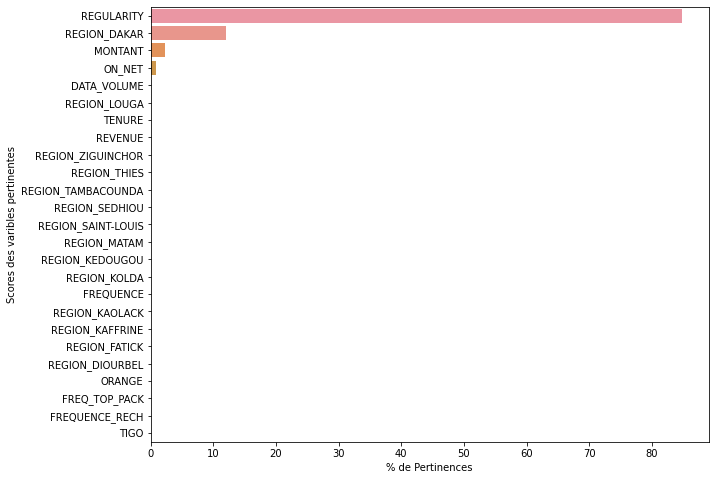

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(x="% de Pertinences", y="Variables", data=variables_perti.sort_values(by="% de Pertinences", ascending=False))
plt.ylabel('Scores des varibles pertinentes')
plt.show()

En représentant sous forme de Tableau de l'importance des caractéristiques, il est clair que la variable **REGULARITY**, c'est à dire le nombre de fois ou le client était actif en 90 jours, était la variable la plus importante pour prédire si le client se désabonnerait dans les 90 jours.<br>
Il s'ensuit respectivement de la variables **REGION_DAKAR**(la région de Dakar), **MONTANT**(montant de recharges) et **ON_NET**(nombre d'appels vers expresso).<br>

L'opérateur téléphonique devrait plus miser ou se focaliser sur ces variables pour étudier, le **phénomène du churn**.

**CONSTRUCTION DE L'ARBRE DE DECISION**

In [34]:
from sklearn.tree import plot_tree

[Text(0.5416666666666666, 0.9, 'REGULARITY <= 5.5\ngini = 0.3\nsamples = 838860\nvalue = [681523, 157337]\nclass = 1'),
 Text(0.25, 0.7, 'REGION_DAKAR <= 0.5\ngini = 0.49\nsamples = 204659\nvalue = [89672, 114987]\nclass = 0'),
 Text(0.16666666666666666, 0.5, 'gini = 0.25\nsamples = 23733\nvalue = [20220, 3513]\nclass = 1'),
 Text(0.3333333333333333, 0.5, 'REGULARITY <= 2.5\ngini = 0.47\nsamples = 180926\nvalue = [69452, 111474]\nclass = 0'),
 Text(0.16666666666666666, 0.3, 'ON_NET <= 25.5\ngini = 0.42\nsamples = 112125\nvalue = [33792, 78333]\nclass = 0'),
 Text(0.08333333333333333, 0.1, 'gini = 0.5\nsamples = 8006\nvalue = [4276, 3730]\nclass = 1'),
 Text(0.25, 0.1, 'gini = 0.41\nsamples = 104119\nvalue = [29516, 74603]\nclass = 0'),
 Text(0.5, 0.3, 'MONTANT <= 2375.0\ngini = 0.5\nsamples = 68801\nvalue = [35660, 33141]\nclass = 1'),
 Text(0.4166666666666667, 0.1, 'gini = 0.42\nsamples = 11794\nvalue = [8198, 3596]\nclass = 1'),
 Text(0.5833333333333334, 0.1, 'gini = 0.5\nsamples = 5

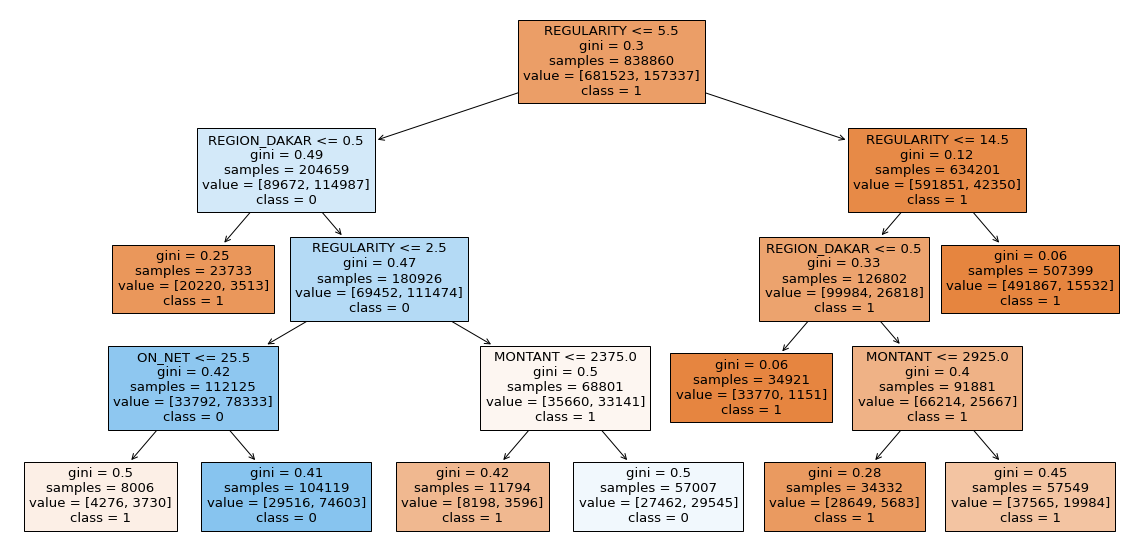

In [35]:
plt.figure(figsize=(20,10))
plot_tree(model,filled=True,feature_names=list(X_train.columns),class_names=["1","0"],precision =2,proportion=False)

**REGLE DE DECISION L'ARBRE DE DECISION**

In [36]:
from sklearn.tree import export_text
print(export_text(model,feature_names=list(X_train.columns),show_weights=True))

|--- REGULARITY <= 5.50
|   |--- REGION_DAKAR <= 0.50
|   |   |--- weights: [20220.00, 3513.00] class: 0
|   |--- REGION_DAKAR >  0.50
|   |   |--- REGULARITY <= 2.50
|   |   |   |--- ON_NET <= 25.50
|   |   |   |   |--- weights: [4276.00, 3730.00] class: 0
|   |   |   |--- ON_NET >  25.50
|   |   |   |   |--- weights: [29516.00, 74603.00] class: 1
|   |   |--- REGULARITY >  2.50
|   |   |   |--- MONTANT <= 2375.00
|   |   |   |   |--- weights: [8198.00, 3596.00] class: 0
|   |   |   |--- MONTANT >  2375.00
|   |   |   |   |--- weights: [27462.00, 29545.00] class: 1
|--- REGULARITY >  5.50
|   |--- REGULARITY <= 14.50
|   |   |--- REGION_DAKAR <= 0.50
|   |   |   |--- weights: [33770.00, 1151.00] class: 0
|   |   |--- REGION_DAKAR >  0.50
|   |   |   |--- MONTANT <= 2925.00
|   |   |   |   |--- weights: [28649.00, 5683.00] class: 0
|   |   |   |--- MONTANT >  2925.00
|   |   |   |   |--- weights: [37565.00, 19984.00] class: 0
|   |--- REGULARITY >  14.50
|   |   |--- weights: [491867.0

**INTERPRETATIONS:**

**REGULARITY <= 5.50**: (la récence du client est  inférieure ou égale à  5 jours).

- On remarque que si ***REGION_DAKAR*** <= 0.50 (le client ne réside pas à DAKAR), alors il est ***loyal***.
- Si ***REGION_DAKAR*** > 0.50 (le client réside au moins à DAKAR)<br>
  -- Si ***REGULARITY*** <= 2.50 (la récence du client est de moins de 1 à 2 jours) et que si la variable ***ON_NET*** son nombre d’appels vers expresso du client, est inférieur 25.50, alors il est ***loyal***.<br>
Cependant, si ON_NET est supérieur 25.50, alors le client est ***perdu***.<br>
  -- Si ***REGULARITY*** > 2.50 (la récence du client est supérieure à 2 jours) et que si le ***montant*** de recharge du client est inférieur à 2375 alors le client est ***loyal***.<br>
Cependant si le ***montant*** de recharges est supérieur à 2375, alors le client est ***perdu***.


**REGULARITY >  5.50**: (la récence du client est  supérieure à  5 jours).

- ***REGULARITY*** <= 14.50 (la récence du client est  inférieur à  15 jours).<br>
On remarque que ***REGION_DAKAR*** <= 0.50 (le client ne réside pas à DAKAR), alors il est ***loyal***.<br>
De même si ***REGION_DAKAR*** > 0.50  (le client réside au moins à DAKAR) que son ***montant*** de recharges soit inférieur ou supérieur à 2925, alors le client est ***loyal***.<br>
- ***REGULARITY*** >  14.50 (la récence du client est  supérieure à  15 jours), alors le client est ***Loyal***.


##  **IV.3.Définition des data driven stratégies de fidélisation**

**REGULARITY <= 5.50** : Régularité inférieure à 5 jours

D'après notre arbre de décision, le phénomène du churn est visible dans la Region de Dakar, c'est à dire que si ***REGION_DAKAR*** est supérieure à 0.5, on rencontre deux lots de clients : 

- Si la récence du client est en ***moins de 2 jours*** et que son nombre d’appels ***inter expresso*** est supérieur à 25 appels, alors ce client est susceptible qu’il se désabonne.<br>
Ce client considéré comme ***inactif***, sa très faible récence est due au fait qu’il y ait une multiplication de la concurrence dans la Region de DAKAR, ce qui rend le client beaucoup plus volatil dans leur comportement d’achat. Il serait difficile de retenir ce client, toutefois, le réseau Expresso pourrait proposer des offres adéquates à son profil pour pouvoir le retenir.<br>

- De même, si le client est actif pour une période de ***2 à 5 jours*** maximum et que son ***montant de recharge*** est supérieur à 2375, alors il est susceptible qu’il se désabonne.<br>
Ce client peut être classé dans le lot ***client dormant à fort potentiel d’achat***. Il contribue en termes de chiffre d’affaire cependant il n’est pas connecté régulièrement dans le réseau.<br>


**REGULARITY >5.50** : Régularité supérieure à 5 jours

- Pour le client ayant une récence de moins de 15 jours, et résidant à DAKAR ou hors DAKAR, alors ce client est **loyal**, même s’il a montant de recharge inférieur ou supérieur à 2925.<br>
Ce profil de client contribue en termes de chiffres d’affaires sauf qu’il faut mettre des stratégies de rétention car sa récence est jugée à ***risque***. Par conséquent, on peut investir des campagnes de rabais, de cadeaux….<br> 

- Pour le client ayant une récence de plus de 15 jours, alors ce client est ***loyal***.
Ce profil de clients est très actifs. Sur ce l'opérateur téléhonique doit faire beaucoup d'efforts pour les satisfaire. Ainsi, il faut définir des stratégies de fidélisation pour le garder absolument.